In [30]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing

In [31]:
# data preparation
data=pd.read_csv('framingham.csv')
data.drop(['education'], inplace=True,axis=1)
data.rename(columns={'male':'Sex_male'}, inplace=True)
data.dropna(axis=0, inplace=True)

In [15]:
data


,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


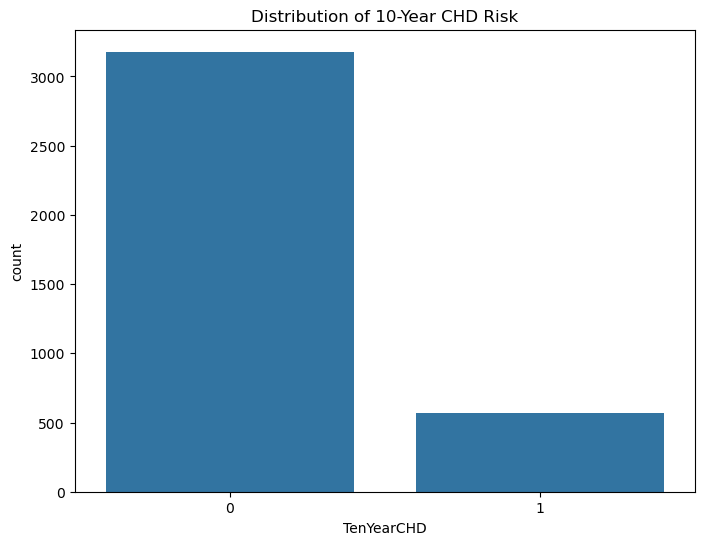

In [16]:
# Exploratory data analysis (EDA)
plt.figure(figsize=(8,6))
sns.countplot(x='TenYearCHD',data=data)
plt.title('Distribution of 10-Year CHD Risk')
plt.show()

In [17]:
print("count of patients with 10-year risk of CHD:")
print(data['TenYearCHD'].value_counts())

count of patients with 10-year risk of CHD:
TenYearCHD
0    3179
1     572
Name: count, dtype: int64


In [18]:
# --- Step 4: Select Features and Target ---
X = np.asarray(data[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])   # Input features
y = np.asarray(data['TenYearCHD'])     # Target variable (0 or 1)

In [19]:
# --- Step 5: Scale Features (Standardization) ---
X = preprocessing.StandardScaler().fit(X).transform(X)   # Mean=0, Std=1


In [20]:
# --- Step 6: Split Data into Train and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=4
)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


In [22]:
# --- Step 7: Build and Train Logistic Regression Model ---
logreg = LogisticRegression()         # Create model object
logreg.fit(X_train, y_train)          # Train model on training data
y_pred = logreg.predict(X_test)       # Predict on test data

In [25]:
# --- Step 8: Evaluate Model Performance ---
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy =', accuracy)


Model Accuracy = 0.8490230905861457


In [32]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Model Precision =', precision)
print('Model Recall =', recall)


Model Precision = 0.6086956521739131
Model Recall = 0.08


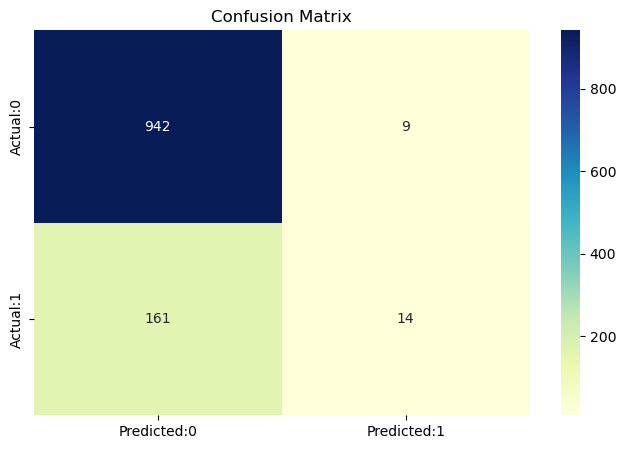

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(cm,
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()

In [27]:
# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126

